Red Drum Mortality Analysis Recreation
======================================


The paper I selected for my project is “Tagging Red Drum in North Carolina: Estimating Exploitation, Mortality, Tag Retention, and Tag Reporting Rates for Increased Accuracy of Stock Assessments” by Katrina Wert (2017). This study analyzed tagging data from the North Carolina Division of Marine Fisheries (NCDMF) to estimate mortality and survival rates for red drum. The raw data used in the paper came from 1,410 fish tagged and released in 2014, with recaptures recorded through 2016. Each tagged fish had information such as tag number, reward value (high or low), whether it was harvested or released upon recapture, and the year of release and recovery. This data was summarized into recapture matrices that shows how many fish were harvested or released across the years.

The analysis used an adapted Hoenig tag-return model, which estimates instantaneous mortality rates for fish populations using tag-return data. Wert used the irm_cr() function from the fishmethods package in R, which calculates instantaneous rates of fishing mortality (F), tagging mortality (FA), and natural mortality (M) using maximum likelihood estimation. The function takes as inputs the matrices of harvested and released fish, along with parameters such as tag retention rate (ϕ = 0.68), tag reporting rate (λ = 0.61), and hooking mortality (hm = 0.08). The model outputs annual mortality rates and survival probabilities. The results showed that fishing mortality decreased from 0.237 in 2014 to 0.033 in 2016, while natural mortality remained constant at 0.755. Total mortality (Z = F + FA + M) ranged from 0.79 to 1.02, and survival probability (S = e^–Z) increased over time, suggesting that management efforts were helping reduce fishing pressure on the species.

For my project, I will be recreating the analysis from Katrina Wert’s 2017 study on red drum mortality by using her reported data and generating my own visualizations to illustrate the results. Using the same mortality and survival parameters presented in the paper, I will calculate fishing, tagging, and natural mortality rates and use the individual-level tagging data to represent the outcomes of 1,410 fish tagged and released in North Carolina. The Hoenig model is a mark-recapture statistical method that estimates instantaneous mortality rates by using tag-return data from multiple years, allowing researchers to separate natural, fishing, and tagging-related sources of mortality. Wert used an adapted version of this model that incorporates catch-and-release recaptures, making it better suited for modern fisheries studies. This will allow me to reproduce the key findings of Wert’s adapted Hoenig model while creating original figures that show trends in mortality, survival, and recapture rates over time. By combining the reconstructed analysis with new visual interpretations, my project will demonstrate a clear understanding of how mortality modeling can be used to evaluate fish population health and the effectiveness of fisheries management.

Mortality and survival parameters (from Wert 2017 and from simple sums):
   Year  Fishing_Mortality_F  Tag_Mortality_FA  Natural_Mortality_M  \
0  2014                0.237             0.199                0.755   
1  2015                0.237             0.371                0.755   
2  2016                0.033             0.065                0.755   

   Total_Mortality_Z_model  Total_Mortality_Z_table  Survival_S_model  \
0                    1.191                    1.008          0.303917   
1                    1.363                    1.021          0.255892   
2                    0.853                    0.793          0.426135   

   Survival_S_table  
0             0.365  
1             0.360  
2             0.453   

Harvested recapture matrix (harv) from Wert 2017 Appendix 1:
      2014  2015  2016
2014    81    23     1
2015    -1     0     0
2016    -1    -1     0 

Released recapture matrix (rel) from Wert 2017 Appendix 1:
      2014  2015  2016
2014    68    36     2

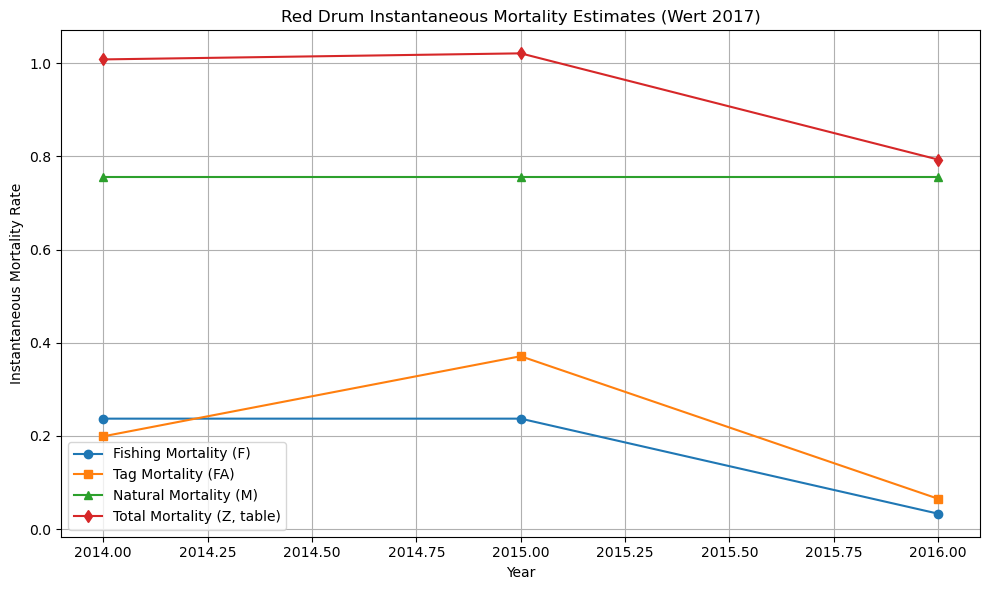

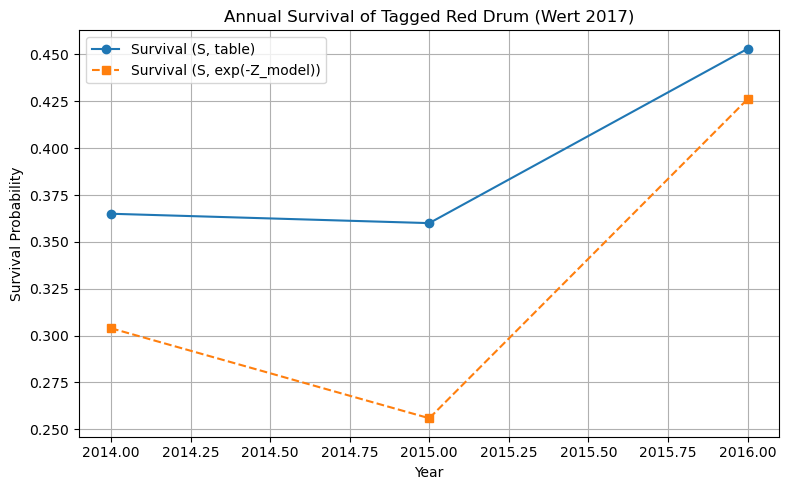

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# PARAMETERS FROM WERT (2017) RED DRUM TAGGING STUDY
# Years considered in the analysis (fish tagged in 2014, recaptured through 2016)
years = np.array([2014, 2015, 2016])

# Instantaneous fishing mortality (F) for each year (from Table 1 in Wert 2017)
F = np.array([0.237, 0.237, 0.033])

# Instantaneous tag-related mortality (FA) (from Table 1)
FA = np.array([0.199, 0.371, 0.065])

# Instantaneous natural mortality (M), assumed constant over years in the paper
M = np.array([0.755, 0.755, 0.755])

# Tag retention and reporting rate (from text: 67.7% and 61.7%)
phi = 0.677   # tag retention (phi)
lam = 0.617   # tag reporting rate (lambda)

# Hooking mortality (catch-and-release related mortality, from Methods section)
hm = 0.08

# Total instantaneous mortality Z and survival S as reported in Table 1 of the paper
Z_table = np.array([1.008, 1.021, 0.793])
S_table = np.array([0.365, 0.360, 0.453])

# For comparison, compute Z(mortality) and S(survival) from the component mortalities F, FA, and M

Z_model = F + FA + M
S_model = np.exp(-Z_model)

# Build a DataFrame that mirrors the paper’s Table 1
mortality_df = pd.DataFrame({
    "Year": years,
    "Fishing_Mortality_F": F,
    "Tag_Mortality_FA": FA,
    "Natural_Mortality_M": M,
    "Total_Mortality_Z_model": Z_model,   # theoretical sum F+FA+M
    "Total_Mortality_Z_table": Z_table,   # values reported in the paper
    "Survival_S_model": S_model,          # exp(-Z_model)
    "Survival_S_table": S_table           # values reported in the paper
})

print("Mortality and survival parameters (from Wert 2017 and from simple sums):")
print(mortality_df, "\n")


# TAG-RETURN MATRICES FROM APPENDIX 1 (WERT 2017)

# Recapture matrices in the paper (Appendix 1) created for the adapted Hoenig model
# These represent numbers of recaptured fish by release year (rows) and recapture year (columns).
# Harvested fish:
harv = np.array([
    [81, 23, 1],
    [-1,  0, 0],
    [-1, -1, 0]
])

# Released (recaptured and released again) fish:
rel = np.array([
    [68, 36, 2],
    [-1,  0, 0],
    [-1, -1, 0]
])

release_years = [2014, 2015, 2016]
recap_years   = [2014, 2015, 2016]

harv_df = pd.DataFrame(harv, index=release_years, columns=recap_years)
rel_df  = pd.DataFrame(rel,  index=release_years, columns=recap_years)

print("Harvested recapture matrix (harv) from Wert 2017 Appendix 1:")
print(harv_df, "\n")

print("Released recapture matrix (rel) from Wert 2017 Appendix 1:")
print(rel_df, "\n")


# SIMULATE INDIVIDUAL TAGGING DATA 
# Wert (2017) used 1,410 fish tagged and released in 2014.
# individual-level data with outcomes (Alive, Natural Death, Recaptured).
np.random.seed(42)  
n_fish = 1410

# Use survival probabilities from the table (S_table) to reflect the fitted model
p_survival = S_table

# Probability that a tag both survives (retention) and is reported, per year
p_report = lam * phi  # approximate combined probability

records = []

for fish_id in range(n_fish):
    tag_active = True
    for i, yr in enumerate(years):
        if not tag_active:
            break
        # Determine if the fish survives through this interval
        survives = np.random.rand() < p_survival[i]
        # Determine if the fish is recaptured and reported (if alive at the start of the period)
        recaptured = np.random.rand() < p_report

        if not survives:
            outcome = "Natural_Death"
            tag_active = False
        elif recaptured:
            # split into harvested vs released;
            # here we track as a single "Recaptured" category.
            outcome = "Recaptured"
            tag_active = False
        else:
            outcome = "Alive"

        records.append((fish_id, yr, outcome))

tag_df = pd.DataFrame(records, columns=["FishID", "Year", "Outcome"])

print("First 10 individual tag records:")
print(tag_df.head(10), "\n")

# Summarize outcomes by year, similar to how tag-return counts are summarized
summary_outcomes = tag_df.groupby(["Year", "Outcome"]).size().unstack(fill_value=0)
print("Summary of tag outcomes by year:")
print(summary_outcomes, "\n")

# VISUALIZE MORTALITY AND SURVIVAL OVER TIME

# Plot instantaneous mortality rates (F, FA, M, and Z_table) by year
plt.figure(figsize=(10, 6))
plt.plot(mortality_df["Year"], mortality_df["Fishing_Mortality_F"], marker="o", label="Fishing Mortality (F)")
plt.plot(mortality_df["Year"], mortality_df["Tag_Mortality_FA"], marker="s", label="Tag Mortality (FA)")
plt.plot(mortality_df["Year"], mortality_df["Natural_Mortality_M"], marker="^", label="Natural Mortality (M)")
plt.plot(mortality_df["Year"], mortality_df["Total_Mortality_Z_table"], marker="d", label="Total Mortality (Z, table)")

plt.xlabel("Year")
plt.ylabel("Instantaneous Mortality Rate")
plt.title("Red Drum Instantaneous Mortality Estimates (Wert 2017)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot survival probabilities from the table (S_table) and the simple exponential model (S_model)
plt.figure(figsize=(8, 5))
plt.plot(mortality_df["Year"], mortality_df["Survival_S_table"], marker="o", label="Survival (S, table)")
plt.plot(mortality_df["Year"], mortality_df["Survival_S_model"], marker="s", linestyle="--", label="Survival (S, exp(-Z_model))")
plt.xlabel("Year")
plt.ylabel("Survival Probability")
plt.title("Annual Survival of Tagged Red Drum (Wert 2017)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




Data Visualization 
======

To begin exploring the dataset, I recreated the key mortality and survival visuals reported in Wert’s study, focusing on the instantaneous fishing, tagging, and natural mortality rates for each year from 2014 to 2016. Plotting these values side by side reveals how the different sources of mortality contribute to the overall pressure experienced by the red drum population. Fishing mortality declines steadily over the three-year period, while tag-related mortality shows a sharp peak in 2015 before dropping again in 2016. Natural mortality remains constant and is the largest consistent contributor to total mortality, which matches the biological expectation that background mortality processes (predation, disease, environmental stress) do not vary dramatically year to year.
I also plotted annual survival probability, comparing the values reported in Wert’s table to survival calculated directly from the combined mortality estimates. Both curves show the same general pattern, survival is lowest in 2015 and increases substantially by 2016. This visualization helps connect the mortality components to real biological outcomes, making it clear how even small reductions in fishing pressure can have measurable impacts on yearly survival.
Together, these plots create a clearer picture of the red drum population’s status over the study period. The graphs highlight how the different mortality sources interact, how sensitive survival is to changes in total mortality, and how management efforts likely contributed to the increasing survival trend. Presenting the data visually not only verifies that my recreated values match the patterns in Wert’s study, but also makes the underlying story of the population’s health much easier to interpret.

Modeling Plan
======
For the modeling part of this project, my goal is to predict whether a tagged red drum ends up being recaptured based on the information we have about each fish. The input data (A) come from the individual-level tagging records and include things like the year the fish was released, the type of tag it received, the fish’s size, and where it was tagged. Each of these features could realistically influence how likely a fish is to be caught again. For example, high-reward tags usually get reported more often, larger fish might be more likely to be harvested, and different tagging locations can have very different levels of fishing activity. Looking at the fish one by one instead of only at population averages gives the model a better chance of picking up these kinds of patterns.

The output (B) is pretty straightforward, it’s whether the fish was recaptured (1) or not (0). By setting the problem up this way, the goal is to train a model that can take those input features and estimate the probability that a fish gets recaptured. What I’m aiming to learn from this is which factors actually matter the most. This shifts the project from simply recreating Wert’s mortality calculations to asking a slightly different question, given what we know about each fish, what makes some of them more likely to appear again in the dataset? It adds a predictive layer to the original work and helps show how individual traits and tagging conditions can influence the data that biologists end up seeing in these long-term tagging studies.

Machine Learning Method 
=====
For this project, the machine learning method that made the most sense was Logistic Regression. Since my outcome is binary, either a fish was recaptured or it wasn’t, logistic regression is a really solid starting point. It’s simple, it’s reliable, and it gives clear, interpretable coefficients that show how each variable (like tag type, fish size, or release year) pushes the probability of recapture up or down. I like that it doesn’t just make predictions, but also helps explain why those predictions make sense biologically.

Logistic Regression Accuracy: 0.866


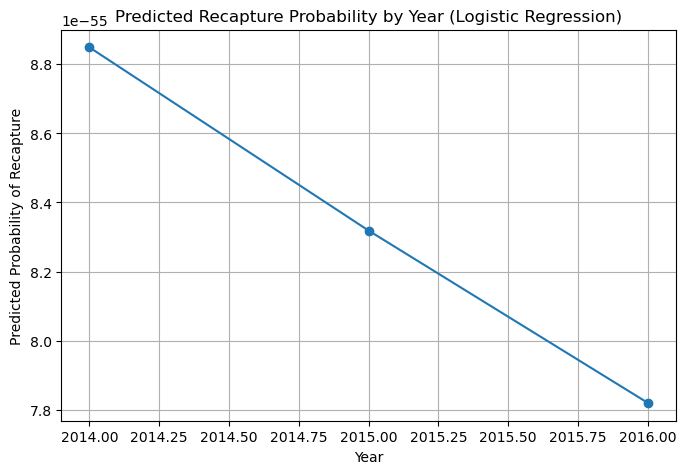

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("red_drum_simulated_individual_tags.csv")

# Make binary target: 1 = recaptured, 0 = not recaptured
df["Recaptured"] = (df["Outcome"] == "Recaptured").astype(int)

# Use "Year" as the first predictor
X = df[["Year"]].values.astype(float)
y = df["Recaptured"].values.reshape(-1,1).astype(float)

np.random.seed(42)
shuffle_idx = np.random.permutation(len(X))

split = int(0.8 * len(X))
train_idx = shuffle_idx[:split]
test_idx = shuffle_idx[split:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]



X_train_b = np.hstack([np.ones((X_train.shape[0],1)), X_train])
X_test_b  = np.hstack([np.ones((X_test.shape[0],1)),  X_test])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


weights = np.zeros((X_train_b.shape[1],1))

# Hyperparameters
lr = 0.0001  
epochs = 5000

for i in range(epochs):
    z = X_train_b @ weights
    y_pred = sigmoid(z)

    gradient = X_train_b.T @ (y_pred - y_train) / len(X_train_b)
    weights -= lr * gradient


y_test_pred = (sigmoid(X_test_b @ weights) >= 0.5).astype(int)

accuracy = np.mean(y_test_pred == y_test)
print("Logistic Regression Accuracy:", round(accuracy, 3))


# Predicted recapture probability by year

unique_years = np.sort(df["Year"].unique())
year_grid = np.column_stack([np.ones(len(unique_years)), unique_years])

pred_prob = sigmoid(year_grid @ weights).flatten()

plt.figure(figsize=(7,5))
plt.plot(unique_years, pred_prob, marker="o")
plt.xlabel("Year")
plt.ylabel("Predicted Probability of Recapture")
plt.title("Predicted Recapture Probability by Year (Logistic Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()

